<a href="https://colab.research.google.com/github/Harshilkumarghori/localrepo/blob/main/1_Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CAR PRICE PRIDICTION**

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
car = pd.read_csv('/content/quikr_car.csv')

In [100]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


**Quality**,
**name** : 3 words
,**company** : dtype:object, (removing value = integer , wrong name)
,**year** : dtype:object, (removing value = data type, strings)
,**price** : dtype:object ,(removing value = only string)
,**kms_driven** : dtype:object, (removing value = only string)
,**fuel_type** : dtype:object, (removing value = nan)


**Cleaning Data**

In [101]:
backup = car.copy()

year

In [102]:
car = car[car['year'].str.isnumeric()]
car['year'] = car['year'].astype(int)

In [103]:
car['year']

,year
0,2007
1,2006
2,2018
3,2014
4,2014
...,...
886,2009
888,2018
889,2013
890,2014


price

In [104]:
car = car[car['Price'] != 'Ask For Price']
car['Price']=car['Price'].str.replace(',','').astype(int)
# remove commas and convert to int

In [105]:
car['Price']

,Price
0,80000
1,425000
3,325000
4,575000
6,175000
...,...
886,300000
888,260000
889,390000
890,180000


kms_driven

In [106]:
car['kms_driven']= car['kms_driven'].str.split(' ').str.get(0).str.replace(',','')
car = car[car['kms_driven'].str.isnumeric()]
car['kms_driven']=car['kms_driven'].astype(int)

In [107]:
car['kms_driven']

,kms_driven
0,45000
1,40
3,28000
4,36000
6,41000
...,...
883,50000
885,30000
886,132000
888,27000


fuel type

In [108]:
car= car[~car['fuel_type'].isna()]


In [109]:
car['fuel_type']

,fuel_type
0,Petrol
1,Diesel
3,Petrol
4,Diesel
6,Diesel
...,...
883,Petrol
885,Diesel
886,Petrol
888,Diesel


name

In [110]:
car['name'] = car['name'].str.split(' ').str.slice(0,3).str.join(' ')

In [111]:
car = car.reset_index(drop=True)

In [112]:
car.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


In [113]:
car=car[car['Price']<6e6].reset_index(drop=True)

In [114]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815 entries, 0 to 814
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        815 non-null    object
 1   company     815 non-null    object
 2   year        815 non-null    int64 
 3   Price       815 non-null    int64 
 4   kms_driven  815 non-null    int64 
 5   fuel_type   815 non-null    object
dtypes: int64(3), object(3)
memory usage: 38.3+ KB


In [115]:
car.to_csv('Cleaned_Car.csv')
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel


In [116]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815 entries, 0 to 814
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        815 non-null    object
 1   company     815 non-null    object
 2   year        815 non-null    int64 
 3   Price       815 non-null    int64 
 4   kms_driven  815 non-null    int64 
 5   fuel_type   815 non-null    object
dtypes: int64(3), object(3)
memory usage: 38.3+ KB


In [117]:
car.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type
count,815,815,815.000000,8.150000e+02,815.000000,815
unique,254,25,NaN,NaN,NaN,3
top,Maruti Suzuki Swift,Maruti,NaN,NaN,NaN,Petrol
freq,51,221,NaN,NaN,NaN,428
mean,NaN,NaN,2012.442945,4.017933e+05,46277.096933,NaN
std,NaN,NaN,4.005079,3.815888e+05,34318.459638,NaN
min,NaN,NaN,1995.000000,3.000000e+04,0.000000,NaN
25%,NaN,NaN,2010.000000,1.750000e+05,27000.000000,NaN
50%,NaN,NaN,2013.000000,2.999990e+05,41000.000000,NaN
75%,NaN,NaN,2015.000000,4.900000e+05,56879.000000,NaN


In [118]:
car['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

**Relation between company and price**

<ipython-input-143-d1015b8957c4>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


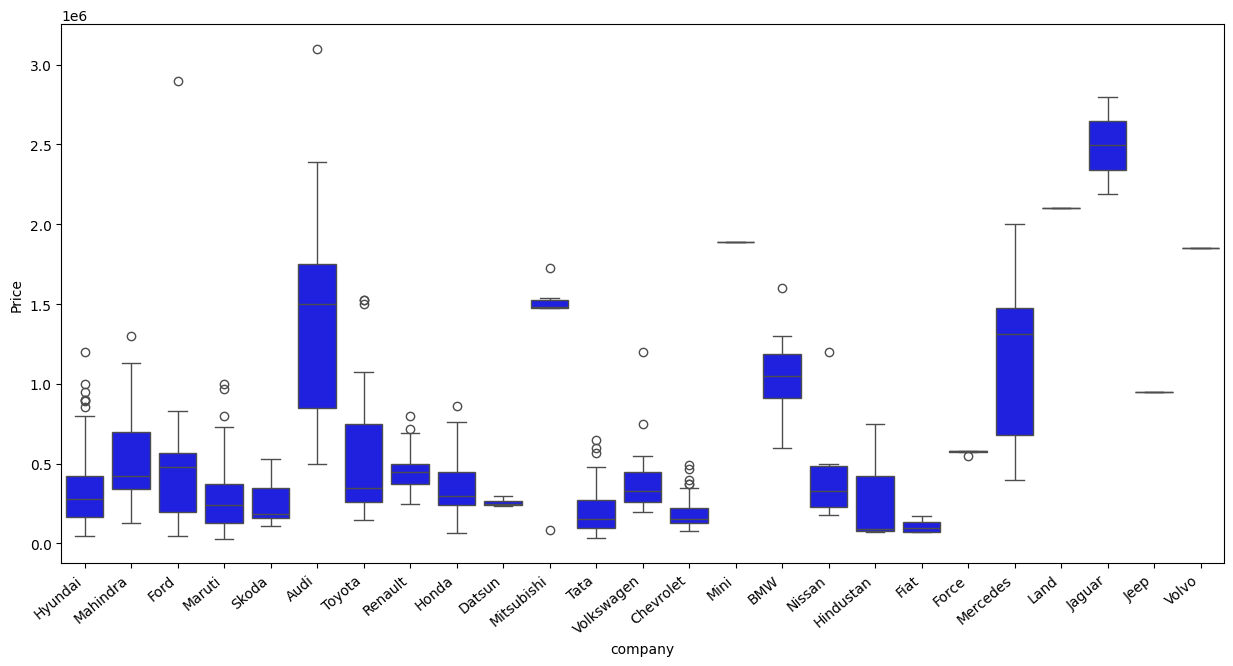

In [143]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=car, color='blue')
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

**Relationship between year and price**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 10.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 17.0% of the points cannot be place

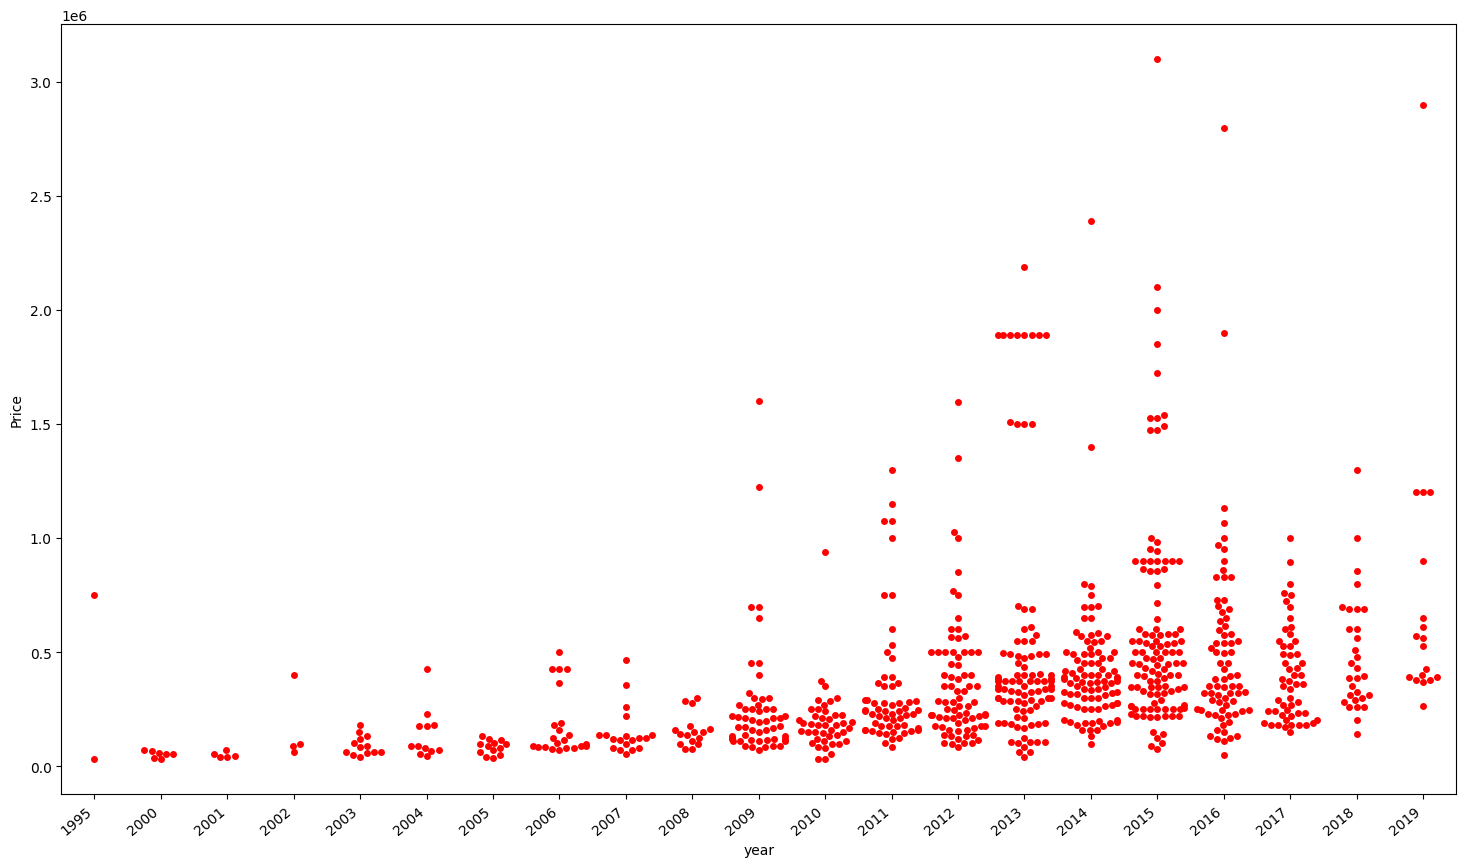

In [146]:
plt.subplots(figsize=(18,10))
ax=sns.swarmplot(x='year',y='Price',data=car, color='Red')
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

****

**Relationship between kms_driven and Price**

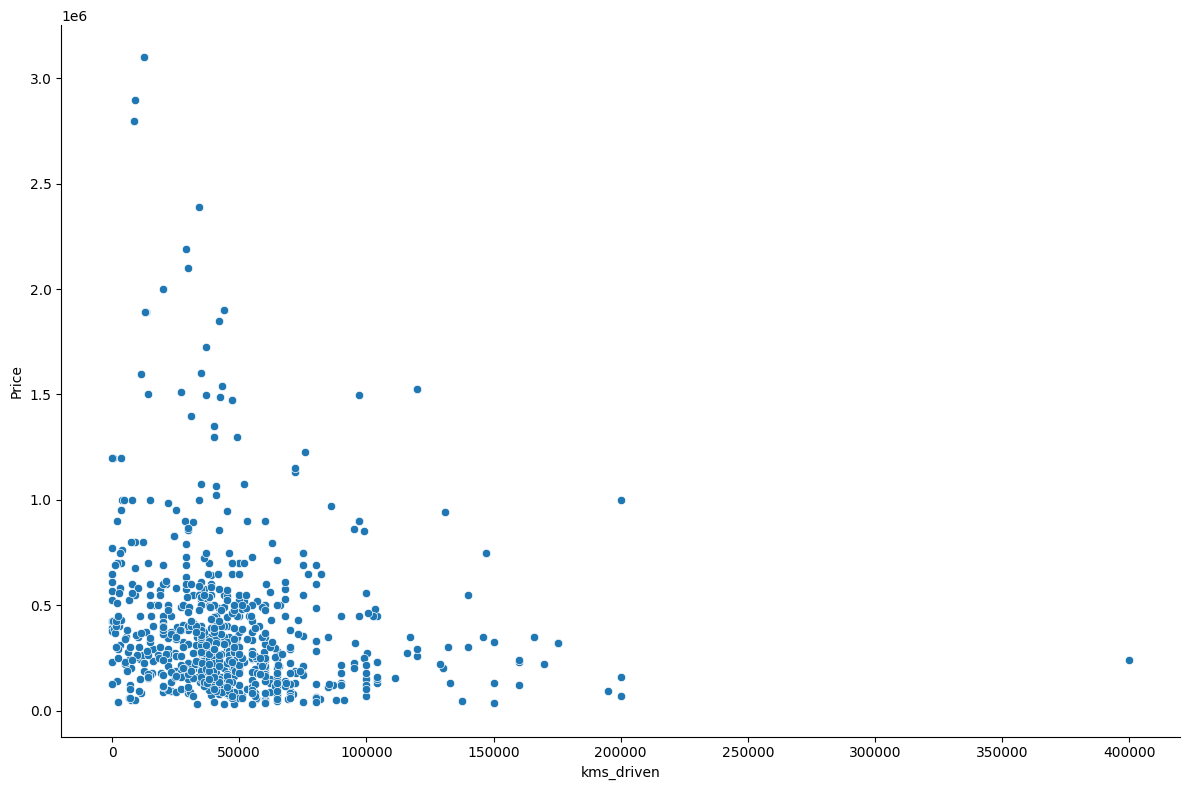

In [155]:
sns.relplot(x='kms_driven',y='Price',data=car,height=8,aspect=1.5)

**Relationship Between fuel_type and price**

<Axes: xlabel='fuel_type', ylabel='Price'>

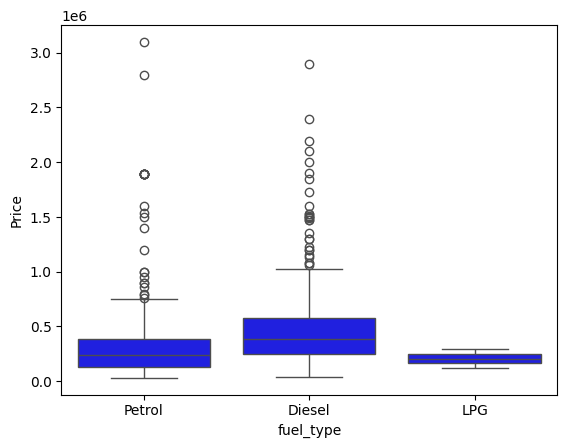

In [156]:
sns.boxplot(x='fuel_type',y='Price',data=car, color='blue')

**Model**




In [120]:
X = car.drop(columns='Price')
y = car['Price']

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

In [122]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [123]:
ohe = OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [124]:
ohe.categories_

[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
        'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
        'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
        'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
        'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
        'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
        'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
        'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
        'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
        'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
        'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
        'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
        'Ford EcoSport Titanium', 'Ford EcoSport Trend',
        'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
        '

In [125]:
X_test

,name,company,year,kms_driven,fuel_type
561,Tata Indigo eCS,Tata,2016,104000,Diesel
473,Tata Indica,Tata,2005,42000,Petrol
574,Hyundai i20 Magna,Hyundai,2010,50000,Petrol
255,Maruti Suzuki Ritz,Maruti,2014,19000,Petrol
235,Honda Amaze,Honda,2015,22000,Petrol
...,...,...,...,...,...
260,Mini Cooper S,Mini,2013,13500,Petrol
484,Tata Nano Lx,Tata,2010,9000,Petrol
168,Mahindra Scorpio S10,Mahindra,2015,97200,Diesel
394,Mahindra Scorpio W,Mahindra,2012,65000,Diesel


In [126]:
column_trf = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),remainder='passthrough')

In [127]:
lr=LinearRegression()

In [128]:
p=make_pipeline(column_trf,lr)

In [129]:
p.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [130]:
X_test

,name,company,year,kms_driven,fuel_type
561,Tata Indigo eCS,Tata,2016,104000,Diesel
473,Tata Indica,Tata,2005,42000,Petrol
574,Hyundai i20 Magna,Hyundai,2010,50000,Petrol
255,Maruti Suzuki Ritz,Maruti,2014,19000,Petrol
235,Honda Amaze,Honda,2015,22000,Petrol
...,...,...,...,...,...
260,Mini Cooper S,Mini,2013,13500,Petrol
484,Tata Nano Lx,Tata,2010,9000,Petrol
168,Mahindra Scorpio S10,Mahindra,2015,97200,Diesel
394,Mahindra Scorpio W,Mahindra,2012,65000,Diesel


In [131]:
y_pred = p.predict(X_test)

In [132]:
r2_score(y_test,y_pred)

0.5873460174447656

In [133]:
Score=[]
for i in range(1000):
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=i)
  lr=LinearRegression()
  p=make_pipeline(column_trf,lr)
  p.fit(X_train,y_train)
  y_pred = p.predict(X_test)
  Score.append(r2_score(y_test,y_pred))

In [134]:
np.argmax(Score)

433

In [135]:
Score[np.argmax(Score)]

0.8457059012561223

In [136]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=np.argmax(Score))
lr=LinearRegression()
p=make_pipeline(column_trf,lr)
p.fit(X_train,y_train)
y_pred = p.predict(X_test)
r2_score(y_test,y_pred)

0.8457059012561223

In [137]:
import pickle

In [138]:
pickle.dump(p,open('LinearRegressionModel.pkl','wb'))

In [139]:
p.predict(pd.DataFrame([['Hyundai Creta 1.6','Hyundai','2016','800','Petrol']], columns=['name','company','year','kms_driven','fuel_type']))
#ord Figo	Ford	2012	175000	41000	Dies

array([577492.58603176])